In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
#importing the dataset
IMAGE_SIZE = [224,224]

train_path=r"C:\Users\Admin\Desktop\python_project\covid19_fungal\dataset"
val_path=r"C:\Users\Admin\Desktop\python_project\covid19_fungal\dataset\val"


In [3]:
#inception v3
# import the inceptionv3 model and here we will be using imagenet weight
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#we don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
#folders in the training set
folders = glob(r'C:/Users/Admin/Desktop/python_project/covid19_fungal/dataset/train/*')
folders

['C:/Users/Admin/Desktop/python_project/covid19_fungal/dataset/train\\black',
 'C:/Users/Admin/Desktop/python_project/covid19_fungal/dataset/train\\white',
 'C:/Users/Admin/Desktop/python_project/covid19_fungal/dataset/train\\yellow_fungal']

In [6]:
#model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
#create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [8]:
#defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
#using the image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Training Generator
training_set = train_datagen.flow_from_directory('C:/Users/Admin/Desktop/python_project/covid19_fungal/dataset/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2880 images belonging to 3 classes.


In [11]:
# Testing Generator
test_set = test_datagen.flow_from_directory('C:/Users/Admin/Desktop/python_project/covid19_fungal/dataset/train/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2880 images belonging to 3 classes.


In [12]:


#fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
90/90 [==============================] - 1071s 12s/step - loss: 1.5590 - acc: 0.7660 - val_loss: 2.2786 - val_acc: 0.7330
Epoch 2/20
90/90 [==============================] - 1067s 12s/step - loss: 0.2947 - acc: 0.9257 - val_loss: 0.9883 - val_acc: 0.8476
Epoch 3/20
90/90 [==============================] - 1067s 12s/step - loss: 0.2226 - acc: 0.9389 - val_loss: 1.6358 - val_acc: 0.7865
Epoch 4/20
90/90 [==============================] - 1070s 12s/step - loss: 0.2710 - acc: 0.9382 - val_loss: 1.3326 - val_acc: 0.8403
Epoch 5/20
90/90 [==============================] - 1092s 12s/step - loss: 0.4242 - acc: 0.9201 - val_loss: 2.1849 - val_acc: 0.7920
Epoch 6/20
90/90 [==============================] - 1072s 12s/step - loss: 0.2681 - acc: 0.9493 - val_loss: 2.6662 - val_acc: 0.7549
Epoch 7/20
90/90 [==============================] - 1068s 12s/step - loss: 0.2391 - acc: 0.9538 - val_loss: 1.2837 - val_acc: 0.8649
Epoch 8/20
90/90 [===

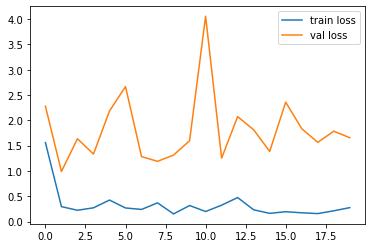

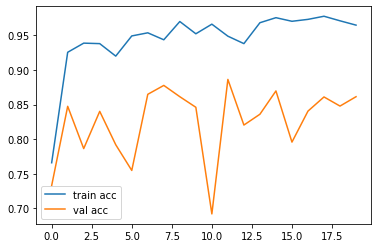

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

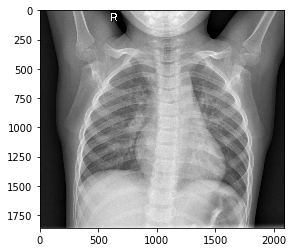

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
%matplotlib inline

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

DATADIR = r"E:\project 2021-2022\covid19black_fungal_stage1_2project\train"

CATEGORIES = ['COVIDPOSITIVE','COVIDNEGATIVE']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


In [3]:
print(img_array.shape)

(1858, 2090)


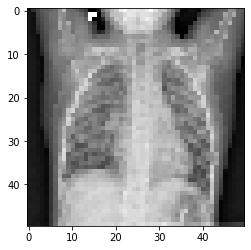

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

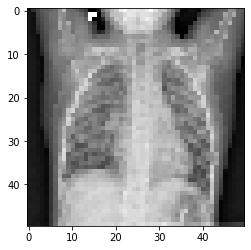

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1)

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████| 3875/3875 [00:24<00:00, 159.30it/s]


5216


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
1
0
1


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 20]
   [ 39]
   [ 29]
   ...
   [173]
   [116]
   [117]]

  [[  7]
   [ 30]
   [ 39]
   ...
   [144]
   [147]
   [168]]

  [[ 10]
   [ 50]
   [ 52]
   ...
   [134]
   [140]
   [144]]

  ...

  [[ 14]
   [ 19]
   [ 21]
   ...
   [  3]
   [ 18]
   [ 20]]

  [[ 14]
   [ 17]
   [ 19]
   ...
   [  0]
   [ 18]
   [ 20]]

  [[ 14]
   [ 19]
   [ 18]
   ...
   [  5]
   [ 18]
   [ 20]]]]


In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle
import sys
import os

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y= np.array(y)
X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Colocations handled automatically by placer.
Train on 3651 samples, validate on 1565 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
3651/3651 [==============================] - ETA: 4:17 - loss: 0.7027 - acc: 0.187 - ETA: 3:22 - loss: 1.7185 - acc: 0.437 - ETA: 3:03 - loss: 1.4015 - acc: 0.510 - ETA: 2:52 - loss: 1.3322 - acc: 0.429 - ETA: 2:46 - loss: 1.2297 - acc: 0.387 - ETA: 2:41 - loss: 1.1411 - acc: 0.375 - ETA: 2:37 - loss: 1.0739 - acc: 0.437 - ETA: 2:34 - loss: 1.0208 - acc: 0.480 - ETA: 2:31 - loss: 0.9779 - acc: 0.506 - ETA: 2:29 - loss: 0.9319 - acc: 0.543 - ETA: 2:26 - loss: 0.8959 - acc: 0.565 - ETA: 2:24 - loss: 0.8818 - acc: 0.575 - ETA: 2:22 - loss: 0.8835 - acc: 0.576 - ETA: 2:21 - loss: 0.8530 - acc: 0.596 - ETA: 2:19 - loss: 0.8324 - acc: 0.608 - ETA: 2:17 - loss: 0.8090 - acc: 0.625 - ETA: 2:15 - loss: 0.7985 - acc: 0.628 - ETA: 2:14 - loss: 0.7925 - acc: 0.628 - ETA: 2:13 - loss: 0.7880 - acc: 0.626 - ETA: 2:11 - loss:

3651/3651 [==============================] - ETA: 2:33 - loss: 0.1287 - acc: 0.937 - ETA: 2:30 - loss: 0.1255 - acc: 0.921 - ETA: 2:30 - loss: 0.1677 - acc: 0.906 - ETA: 2:29 - loss: 0.2063 - acc: 0.898 - ETA: 2:27 - loss: 0.2317 - acc: 0.900 - ETA: 2:26 - loss: 0.2128 - acc: 0.906 - ETA: 2:25 - loss: 0.2179 - acc: 0.906 - ETA: 2:23 - loss: 0.2335 - acc: 0.910 - ETA: 2:22 - loss: 0.2260 - acc: 0.909 - ETA: 2:21 - loss: 0.2109 - acc: 0.915 - ETA: 2:20 - loss: 0.2249 - acc: 0.911 - ETA: 2:18 - loss: 0.2118 - acc: 0.916 - ETA: 2:17 - loss: 0.2168 - acc: 0.911 - ETA: 2:16 - loss: 0.2165 - acc: 0.910 - ETA: 2:14 - loss: 0.2035 - acc: 0.916 - ETA: 2:13 - loss: 0.2017 - acc: 0.916 - ETA: 2:11 - loss: 0.1963 - acc: 0.919 - ETA: 2:10 - loss: 0.1880 - acc: 0.921 - ETA: 2:09 - loss: 0.1884 - acc: 0.921 - ETA: 2:07 - loss: 0.1818 - acc: 0.923 - ETA: 2:06 - loss: 0.1797 - acc: 0.922 - ETA: 2:05 - loss: 0.1759 - acc: 0.923 - ETA: 2:03 - loss: 0.1706 - acc: 0.926 - ETA: 2:02 - loss: 0.1679 - acc: 0.9

In [12]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import sys
import os

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y= np.array(y)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1637327543
Train on 3651 samples, validate on 1565 samples
Epoch 1/10
3651/3651 [==============================] - ETA: 59s - loss: 0.6905 - acc: 0.68 - ETA: 41s - loss: 0.6719 - acc: 0.68 - ETA: 34s - loss: 0.6566 - acc: 0.68 - ETA: 31s - loss: 0.6738 - acc: 0.66 - ETA: 29s - loss: 0.6405 - acc: 0.69 - ETA: 27s - loss: 0.6172 - acc: 0.71 - ETA: 26s - loss: 0.5986 - acc: 0.72 - ETA: 25s - loss: 0.5899 - acc: 0.73 - ETA: 25s - loss: 0.5668 - acc: 0.75 - ETA: 24s - loss: 0.6076 - acc: 0.73 - ETA: 24s - loss: 0.5875 - acc: 0.74 - ETA: 23s - loss: 0.5909 - acc: 0.74 - ETA: 23s - loss: 0.5823 - acc: 0.74 - ETA: 22s - loss: 0.5761 - acc: 0.75 - ETA: 22s - loss: 0.5753 - acc: 0.75 - ETA: 22s - loss: 0.5791 - acc: 0.74 - ETA: 21s - loss: 0.5745 - acc: 0.75 - ETA: 21s - loss: 0.5713 - acc: 0.75 - ETA: 21s - loss: 0.5706 - acc: 0.75 - ETA: 20s - loss: 0.5710 - acc: 0.75 - ETA: 20s - loss: 0.5707 - acc: 0.75 - ETA: 20s - loss: 0.5748 - acc: 0.74 - ETA: 19s - loss: 0.5699 -

3651/3651 [==============================] - ETA: 26s - loss: 0.3690 - acc: 0.84 - ETA: 25s - loss: 0.2998 - acc: 0.84 - ETA: 24s - loss: 0.2464 - acc: 0.87 - ETA: 24s - loss: 0.2177 - acc: 0.89 - ETA: 23s - loss: 0.2002 - acc: 0.90 - ETA: 23s - loss: 0.1835 - acc: 0.91 - ETA: 23s - loss: 0.1926 - acc: 0.91 - ETA: 23s - loss: 0.1988 - acc: 0.91 - ETA: 22s - loss: 0.1920 - acc: 0.91 - ETA: 22s - loss: 0.1775 - acc: 0.92 - ETA: 22s - loss: 0.1752 - acc: 0.92 - ETA: 22s - loss: 0.1738 - acc: 0.92 - ETA: 21s - loss: 0.1785 - acc: 0.91 - ETA: 21s - loss: 0.1713 - acc: 0.92 - ETA: 21s - loss: 0.1695 - acc: 0.92 - ETA: 21s - loss: 0.1720 - acc: 0.92 - ETA: 21s - loss: 0.1664 - acc: 0.93 - ETA: 20s - loss: 0.1744 - acc: 0.92 - ETA: 20s - loss: 0.1723 - acc: 0.92 - ETA: 20s - loss: 0.1707 - acc: 0.93 - ETA: 20s - loss: 0.1667 - acc: 0.93 - ETA: 20s - loss: 0.1617 - acc: 0.93 - ETA: 19s - loss: 0.1587 - acc: 0.93 - ETA: 19s - loss: 0.1626 - acc: 0.93 - ETA: 19s - loss: 0.1609 - acc: 0.93 - ETA: 

3651/3651 [==============================] - ETA: 33s - loss: 0.0871 - acc: 0.96 - ETA: 28s - loss: 0.1383 - acc: 0.92 - ETA: 26s - loss: 0.1021 - acc: 0.94 - ETA: 25s - loss: 0.1027 - acc: 0.94 - ETA: 24s - loss: 0.1345 - acc: 0.93 - ETA: 24s - loss: 0.1417 - acc: 0.92 - ETA: 24s - loss: 0.1481 - acc: 0.92 - ETA: 24s - loss: 0.1396 - acc: 0.93 - ETA: 24s - loss: 0.1365 - acc: 0.93 - ETA: 24s - loss: 0.1290 - acc: 0.94 - ETA: 24s - loss: 0.1218 - acc: 0.94 - ETA: 24s - loss: 0.1229 - acc: 0.94 - ETA: 23s - loss: 0.1259 - acc: 0.94 - ETA: 23s - loss: 0.1200 - acc: 0.94 - ETA: 23s - loss: 0.1137 - acc: 0.95 - ETA: 22s - loss: 0.1231 - acc: 0.94 - ETA: 22s - loss: 0.1187 - acc: 0.95 - ETA: 22s - loss: 0.1161 - acc: 0.95 - ETA: 21s - loss: 0.1165 - acc: 0.95 - ETA: 21s - loss: 0.1159 - acc: 0.95 - ETA: 21s - loss: 0.1148 - acc: 0.95 - ETA: 21s - loss: 0.1181 - acc: 0.95 - ETA: 20s - loss: 0.1177 - acc: 0.95 - ETA: 20s - loss: 0.1236 - acc: 0.95 - ETA: 20s - loss: 0.1244 - acc: 0.95 - ETA: 

3651/3651 [==============================] - ETA: 26s - loss: 0.1541 - acc: 0.90 - ETA: 25s - loss: 0.1089 - acc: 0.93 - ETA: 25s - loss: 0.1435 - acc: 0.93 - ETA: 24s - loss: 0.1220 - acc: 0.94 - ETA: 24s - loss: 0.1035 - acc: 0.95 - ETA: 23s - loss: 0.0936 - acc: 0.96 - ETA: 23s - loss: 0.0951 - acc: 0.96 - ETA: 23s - loss: 0.0892 - acc: 0.96 - ETA: 23s - loss: 0.0896 - acc: 0.96 - ETA: 22s - loss: 0.0836 - acc: 0.96 - ETA: 22s - loss: 0.0799 - acc: 0.97 - ETA: 22s - loss: 0.0784 - acc: 0.97 - ETA: 22s - loss: 0.0752 - acc: 0.97 - ETA: 22s - loss: 0.0740 - acc: 0.97 - ETA: 21s - loss: 0.0704 - acc: 0.97 - ETA: 21s - loss: 0.0674 - acc: 0.97 - ETA: 21s - loss: 0.0644 - acc: 0.97 - ETA: 21s - loss: 0.0630 - acc: 0.98 - ETA: 20s - loss: 0.0610 - acc: 0.98 - ETA: 20s - loss: 0.0634 - acc: 0.97 - ETA: 20s - loss: 0.0624 - acc: 0.97 - ETA: 20s - loss: 0.0662 - acc: 0.97 - ETA: 20s - loss: 0.0683 - acc: 0.97 - ETA: 19s - loss: 0.0738 - acc: 0.97 - ETA: 19s - loss: 0.0757 - acc: 0.97 - ETA: 

3651/3651 [==============================] - ETA: 26s - loss: 0.0899 - acc: 0.96 - ETA: 24s - loss: 0.0614 - acc: 0.98 - ETA: 23s - loss: 0.0511 - acc: 0.98 - ETA: 23s - loss: 0.0480 - acc: 0.98 - ETA: 24s - loss: 0.0841 - acc: 0.97 - ETA: 23s - loss: 0.0721 - acc: 0.97 - ETA: 23s - loss: 0.0986 - acc: 0.96 - ETA: 23s - loss: 0.1037 - acc: 0.95 - ETA: 22s - loss: 0.1002 - acc: 0.95 - ETA: 22s - loss: 0.1065 - acc: 0.95 - ETA: 22s - loss: 0.1044 - acc: 0.95 - ETA: 22s - loss: 0.1028 - acc: 0.95 - ETA: 21s - loss: 0.1027 - acc: 0.95 - ETA: 21s - loss: 0.1136 - acc: 0.95 - ETA: 21s - loss: 0.1126 - acc: 0.95 - ETA: 21s - loss: 0.1097 - acc: 0.95 - ETA: 21s - loss: 0.1178 - acc: 0.95 - ETA: 20s - loss: 0.1160 - acc: 0.95 - ETA: 20s - loss: 0.1181 - acc: 0.95 - ETA: 20s - loss: 0.1138 - acc: 0.95 - ETA: 20s - loss: 0.1147 - acc: 0.95 - ETA: 20s - loss: 0.1124 - acc: 0.95 - ETA: 19s - loss: 0.1104 - acc: 0.95 - ETA: 19s - loss: 0.1106 - acc: 0.95 - ETA: 19s - loss: 0.1081 - acc: 0.95 - ETA: 

In [13]:
import cv2
import tensorflow as tf

CATEGORIES = ['COVIDPOSITIVE','COVIDNEGATIVE']  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [14]:
model = tf.keras.models.load_model("64x3-CNN.model")